# Optimizing 2

In [1]:
from fyp_code import loukas_esn, optimize2, utilities as util
from colorama import Fore
import numpy as np
import matplotlib.pyplot as plt
import math
import copy
plt.rcParams["figure.figsize"] = [10,5]
plt.rcParams['figure.dpi'] = 100

In [2]:
# initialise input data
data_mg = util.data_mg()
data_sin1 = util.data_sin(order=1)
data_sin2 = util.data_sin(order=2)
data_sin3 = util.data_sin(order=3)

# initialise parameter spaces for mg
rhos_mg = np.linspace(0.7,1.3,20)
alphas_mg = np.linspace(0.3,0.9,20)
betas_mg = np.logspace(-8,-3,20)
rho_mg = 1.1
alpha_mg = 0.7
beta_mg = 1e-7
sparse_mg = 0.5
N_mg = 500

inodes = 1      # input nodes
onodes = 1      # output nodes
ttr = 1000      # training time
twash = 200     # washout time

In [3]:
# initialise Optimizer2 object
esn = loukas_esn.Esn(data_mg, rho_mg, alpha_mg, beta_mg, inodes, onodes, ttr, twash, N_mg, sparse_mg)
opt_mg = optimize2.Optimizer2(esn, rhos_mg, alphas_mg, betas_mg)

## Grid-search functions

#### Optimize rho

In [4]:
opt_r = opt_mg.opt_rho(mute=False)

rho: 0.7, nmse: 2.435434, 5%
rho: 0.732, nmse: 0.421005, 10%
rho: 0.763, nmse: 0.844685, 15%
rho: 0.795, nmse: 1.477923, 20%
rho: 0.826, nmse: 1.183542, 25%
rho: 0.858, nmse: 0.86208, 30%
rho: 0.889, nmse: 0.184625, 35%
rho: 0.921, nmse: 0.438677, 40%
rho: 0.953, nmse: 0.197481, 45%
rho: 0.984, nmse: 0.422509, 50%
rho: 1.016, nmse: 0.529654, 55%
rho: 1.047, nmse: 0.439758, 60%
rho: 1.079, nmse: 0.319211, 65%
rho: 1.111, nmse: 0.150763, 70%
rho: 1.142, nmse: 0.078317, 75%
rho: 1.174, nmse: 0.039752, 80%
rho: 1.205, nmse: 0.04912, 85%
rho: 1.237, nmse: 0.020207, 90%
rho: 1.268, nmse: 0.129321, 95%
rho: 1.3, nmse: 0.021703, 100%
rho: 1.236842105263158
nmse: 0.020206619550986564


#### Optimize alpha

In [5]:
opt_a = opt_mg.opt_alpha(mute=True)
print("optimal alpha: {}\nnmse: {}\nalpha/nmse dictionary: {}".format(opt_a[0],opt_a[1],opt_a[2]))

optimal alpha: 0.33157894736842103
nmse: 0.004332639907862637
alpha/nmse dictionary: {0.3: 0.04554429312822384, 0.33157894736842103: 0.004332639907862637, 0.3631578947368421: 0.0293374402900513, 0.39473684210526316: 0.037467870717098894, 0.4263157894736842: 0.059240641420732786, 0.4578947368421053: 0.04470037548275825, 0.48947368421052634: 0.05240449853168482, 0.5210526315789474: 0.05548112028337402, 0.5526315789473685: 0.0756900436579547, 0.5842105263157895: 0.1653692529512291, 0.6157894736842107: 0.20653452693088095, 0.6473684210526316: 0.1893991146533052, 0.6789473684210527: 0.21265588139775699, 0.7105263157894738: 0.23507996875766066, 0.7421052631578948: 0.22199580749653897, 0.773684210526316: 0.18383208079172367, 0.8052631578947369: 0.063267386635603, 0.836842105263158: 0.03503903145914077, 0.868421052631579: 0.04344278108918002, 0.9: 0.2983714147486804}


#### Optimize rho + alpha

In [6]:
r, a, nmse = opt_mg.opt_rho_alpha()
r, a, nmse

rho: 0.7-1.3, alpha: 0.3, 5%
rho: 0.7-1.3, alpha: 0.332, 10%
rho: 0.7-1.3, alpha: 0.363, 15%
rho: 0.7-1.3, alpha: 0.395, 20%
rho: 0.7-1.3, alpha: 0.426, 25%
rho: 0.7-1.3, alpha: 0.458, 30%
rho: 0.7-1.3, alpha: 0.489, 35%
rho: 0.7-1.3, alpha: 0.521, 40%
rho: 0.7-1.3, alpha: 0.553, 45%
rho: 0.7-1.3, alpha: 0.584, 50%
rho: 0.7-1.3, alpha: 0.616, 55%
rho: 0.7-1.3, alpha: 0.647, 60%
rho: 0.7-1.3, alpha: 0.679, 65%
rho: 0.7-1.3, alpha: 0.711, 70%
rho: 0.7-1.3, alpha: 0.742, 75%
rho: 0.7-1.3, alpha: 0.774, 80%
rho: 0.7-1.3, alpha: 0.805, 85%
rho: 0.7-1.3, alpha: 0.837, 90%
rho: 0.7-1.3, alpha: 0.868, 95%
rho: 0.7-1.3, alpha: 0.9, 100%
rho: 1.3
alpha: 0.39473684210526316
nmse: 0.0005020579610046847


(1.3, 0.39473684210526316, 0.0005020579610046847)

#### Optimize beta

In [7]:
opt_bv = opt_mg.opt_beta_val(mute=True)
optimize2.print_optimal(opt_bv[2],"beta")

Optimal beta: 1.8329807108324374e-08, nmse: 7.926614392980449e-07


In [8]:
opt_bt = opt_mg.opt_beta_test(mute=False)

beta: 1e-08, nmse: 1.025742, 5%
beta: 1.8329807108324374e-08, nmse: 0.321975, 10%
beta: 3.3598182862837814e-08, nmse: 1.413377, 15%
beta: 6.158482110660267e-08, nmse: 0.220373, 20%
beta: 1.1288378916846883e-07, nmse: 0.232748, 25%
beta: 2.06913808111479e-07, nmse: 0.273323, 30%
beta: 3.792690190732254e-07, nmse: 0.473551, 35%
beta: 6.951927961775605e-07, nmse: 0.575477, 40%
beta: 1.2742749857031322e-06, nmse: 0.706216, 45%
beta: 2.335721469090121e-06, nmse: 0.824961, 50%
beta: 4.281332398719396e-06, nmse: 0.921361, 55%
beta: 7.847599703514607e-06, nmse: 0.989516, 60%
beta: 1.438449888287663e-05, nmse: 0.885039, 65%
beta: 2.6366508987303556e-05, nmse: 0.525991, 70%
beta: 4.8329302385717524e-05, nmse: 0.211626, 75%
beta: 8.858667904100833e-05, nmse: 0.135608, 80%
beta: 0.0001623776739188721, nmse: 0.133801, 85%
beta: 0.00029763514416313193, nmse: 0.131515, 90%
beta: 0.0005455594781168515, nmse: 0.129893, 95%
beta: 0.001, nmse: 0.154899, 100%
beta: 0.0005455594781168515
nmse: 0.1298934033

#### Optimize W sparsity

In [9]:
opt_Ws = opt_mg.opt_W_sparsity(start=0.2,end=0.75,count=13.6,mute=False)

sparsity: 0.2, nmse: 0.097763, 27%
sparsity: 0.246, nmse: 0.289913, 32%
sparsity: 0.292, nmse: 0.281384, 36%
sparsity: 0.338, nmse: 0.265065, 41%
sparsity: 0.383, nmse: 0.249317, 46%
sparsity: 0.429, nmse: 0.156039, 50%
sparsity: 0.475, nmse: 0.171069, 55%
sparsity: 0.521, nmse: 0.176964, 59%
sparsity: 0.567, nmse: 0.158949, 64%
sparsity: 0.612, nmse: 0.010367, 68%
sparsity: 0.658, nmse: 0.176183, 73%
sparsity: 0.704, nmse: 0.080703, 78%
sparsity: 0.75, nmse: 0.165815, 82%
sparsity: 0.6125
nmse: 0.010366541283429953


## Plotting optimizations

#### Plotting rho

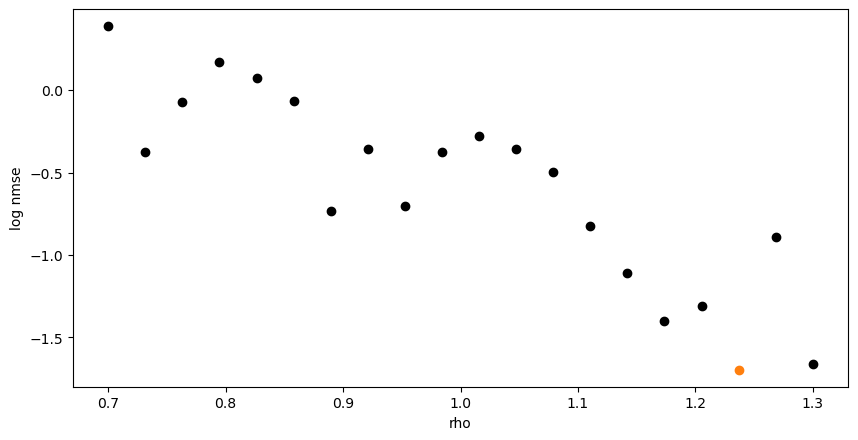


Optimal rho: 1.236842105263158, nmse: 0.020206619550986564


In [10]:
rn = opt_mg.collect_rhos(mute=True)
opt_mg.plot_rhos(rn)

opt_rho = optimize2.min_from_dict(rn)
print(Fore.GREEN + "\nOptimal rho: {}, nmse: {}".format(opt_rho,rn[opt_rho]))

#### Plotting alpha

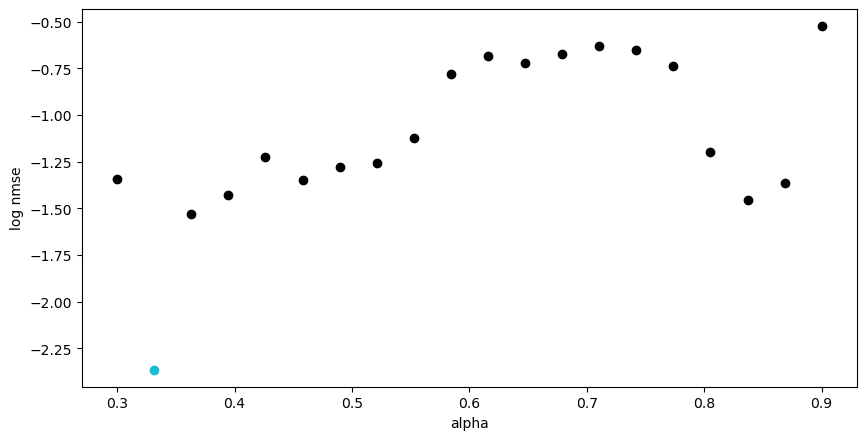


Optimal alpha: 0.33157894736842103, nmse: 0.004332639907862637


In [11]:
an = opt_mg.collect_alphas(mute=True)
opt_mg.plot_alphas(an)

opt_alpha = optimize2.min_from_dict(an)
print(Fore.GREEN + "\nOptimal alpha: {}, nmse: {}".format(opt_alpha,an[opt_alpha]))

#### Plotting beta

beta: 1e-08, nmse: 1.025742, 5%
beta: 1.8329807108324374e-08, nmse: 0.321975, 10%
beta: 3.3598182862837814e-08, nmse: 1.413377, 15%
beta: 6.158482110660267e-08, nmse: 0.220373, 20%
beta: 1.1288378916846883e-07, nmse: 0.232748, 25%
beta: 2.06913808111479e-07, nmse: 0.273323, 30%
beta: 3.792690190732254e-07, nmse: 0.473551, 35%
beta: 6.951927961775605e-07, nmse: 0.575477, 40%
beta: 1.2742749857031322e-06, nmse: 0.706216, 45%
beta: 2.335721469090121e-06, nmse: 0.824961, 50%
beta: 4.281332398719396e-06, nmse: 0.921361, 55%
beta: 7.847599703514607e-06, nmse: 0.989516, 60%
beta: 1.438449888287663e-05, nmse: 0.885039, 65%
beta: 2.6366508987303556e-05, nmse: 0.525991, 70%
beta: 4.8329302385717524e-05, nmse: 0.211626, 75%
beta: 8.858667904100833e-05, nmse: 0.135608, 80%
beta: 0.0001623776739188721, nmse: 0.133801, 85%
beta: 0.00029763514416313193, nmse: 0.131515, 90%
beta: 0.0005455594781168515, nmse: 0.129893, 95%
beta: 0.001, nmse: 0.154899, 100%
beta: 0.0005455594781168515
nmse: 0.1298934033

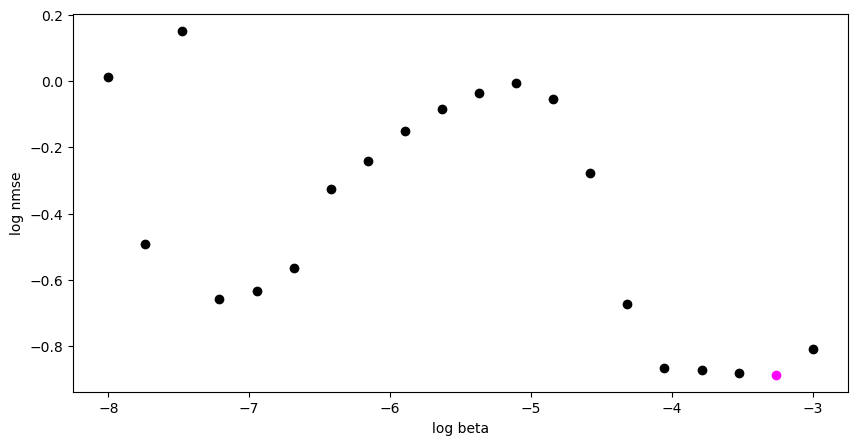


Optimal beta: 0.0005455594781168515, nmse: 0.12989340335531308


In [12]:
bn = opt_mg.collect_betas(mute=False)
opt_mg.plot_betas(bn)

opt_beta = optimize2.min_from_dict(bn)
print(Fore.GREEN + "\nOptimal beta: {}, nmse: {}".format(opt_beta,bn[opt_beta]))

#### Plotting W sparsity

Changes in W sparsity have a minimal effect on performance once sufficiently distant from the extremes, 0 and 1. Even 0.05-0.95 qualifies at sufficiently distant.

Additionally, changing sparsity unavoidably affects the random nature of the W matrix, so if other parameters have been optimized for a W matrix of particular sparsity, there's no guarantee these parameters will be optimal for any other sparsity or W matrix by extension.

In other words, sparsity optimization is available but low priority. Could be useful if other parameters are fixed and unoptimizable.

In [13]:
sn = opt_mg.collect_W_sparsities(start=0.1,end=0.9,count=20,mute=True)
opt_mg.plot_W_sparsities(sn)

optimize2.print_optimal(sn,"W sparsity")

TypeError: collect_W_sparsities() got an unexpected keyword argument 'start'

## Equality checking

In [ ]:
# make a copy of the esn to check
e1 = copy.deepcopy(opt_mg.esn)

In [ ]:
# run opt_mg for some optimization and then come back here to check if/how any variables changed (they shouldn't have)
loukas_esn.compare_vars(e1,opt_mg.esn)

In [ ]:
# see what happens when they do change:
e1 = copy.deepcopy(opt_mg.esn)
e1.set_rho(0.96)
e1.set_beta(5)
e1.set_alpha(6.4e-3)
e1.W = np.random.uniform(low=-1.5, high=1.5, size=(N_mg,N_mg))
loukas_esn.compare_vars(e1,opt_mg.esn)

## Example optimization script

In [ ]:
# initialise input data
data_mg = util.data_mg()

# initialise parameter spaces
rhos_mg = np.linspace(0.7,1.3,20)
alphas_mg = np.linspace(0.3,0.9,20)
betas_mg = np.logspace(-8,-3,20)

# initialise parameter values
rho_mg = 1.1
alpha_mg = 0.7
beta_mg = 1e-7
sparse_mg = 0.5
N_mg = 500

inodes = 1      # input nodes
onodes = 1      # output nodes
ttr = 1000      # training time
twash = 200     # washout time

# initialise Esn & Optimizer2 object
esn_0 = loukas_esn.Esn(data_mg, rho_mg, alpha_mg, beta_mg, inodes, onodes, ttr, twash, N_mg, sparse_mg)       # keep this unchanged
esn_mg = copy.deepcopy(esn_0)                                                                                 # optimize this one
opt_mg = optimize2.Optimizer2(esn_mg, rhos_mg, alphas_mg, betas_mg, test_time=1000)

# optimize for rho/alpha
r, a, n = opt_mg.opt_rho_alpha()

# set new improved rho/alpha values
opt_mg.esn.set_rho(r)
opt_mg.esn.set_alpha(a)

# optimize for beta with new rho/alpha values
b, nb, bdict = opt_mg.opt_beta_test(mute=True)
optimize2.print_optimal(bdict, "beta")

# set new improved beta value
opt_mg.esn.set_beta(b)

In [ ]:
# see the difference
esn_0.train()
esn_0.test(test_time=1000)
esn_0.plot_test()
print(Fore.CYAN + "Original ESN: nmse test = {}".format(esn_0.nmse_test))
print(Fore.GREEN + "rho = {}\nalpha = {}\nbeta = {}".format(rho_mg,alpha_mg,beta_mg))

In [ ]:
esn_mg.train()
esn_mg.test(test_time=1000)
esn_mg.plot_test()
print(Fore.CYAN + "Optimized ESN: nmse test = {}".format(esn_mg.nmse_test))
print(Fore.GREEN + "rho = {}\nalpha = {}\nbeta = {}".format(r,a,b))

### Further optimization

In [ ]:
# reset esn activations to initial conditions
esn_mg.reset_x()

# optimize for W sparsity with new rho, alpha, beta
s, ns, sdict = opt_mg.opt_W_sparsity(start=0.2,end=0.95,count=20)

# set new improved W sparsity value
opt_mg.esn.set_W_sparsity(s)

In [ ]:
# see the difference
esn_mg.train()
esn_mg.test(test_time=1000)
esn_mg.plot_test()
print(Fore.CYAN + "Optimized ESN: nmse test = {}".format(esn_mg.nmse_test))
print(Fore.GREEN + "rho = {}\nalpha = {}\nbeta = {}\nW-sparsity = {}".format(r,a,b,s))